In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
raw_data = pd.read_csv(r"C:\Users\Kevin's PC\Desktop\The Data Science Course 2020 - All Resources\ipl_dataset1.csv")
raw_data

,PLAYER,Mat.x,Inns.x,NO,Runs.x,HS,Avg.x,BF,SR.x,X100,...,Ov,Runs.y,Wkts,BBI,Avg.y,Econ,SR.y,X4w,X5w,y
0,Aaron Finch,10,9,1,134,46,16.75,100,134.00,0,...,0.0,0,0,0,0,0.00,0,0,0,0
1,AB de Villiers,12,11,2,480,90,53.33,275,174.54,0,...,0.0,0,0,0,0,0.00,0,0,0,0
2,Abhishek Sharma,3,3,2,63,46,63.00,33,190.90,0,...,0.0,0,0,0,0,0.00,0,0,0,0
3,Ajinkya Rahane,15,14,1,370,65,28.46,313,118.21,0,...,0.0,0,0,0,0,0.00,0,0,0,0
4,Alex Hales,6,6,0,148,45,24.66,118,125.42,0,...,0.0,0,0,0,0,0.00,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Siddarth Kaul,0,0,0,0,0,0.00,0,0.00,0,...,66.0,547,21,0,26.04,8.28,18.85,0,0,0
139,Trent Boult,0,0,0,0,0,0.00,0,0.00,0,...,52.4,466,18,0,25.88,8.84,17.55,0,0,0
140,Umesh Yadav,0,0,0,0,0,0.00,0,0.00,0,...,53.1,418,20,0,20.9,7.86,15.95,0,0,0
141,Vi0y Kumar,0,0,0,0,0,0.00,0,0.00,0,...,3.5,65,2,0,32.5,16.95,11.5,0,0,0


In [3]:
raw_data.describe()

,Mat.x,Inns.x,NO,Runs.x,HS,Avg.x,BF,SR.x,X100,X50,...,Mat.y,Inns.y,Ov,Runs.y,Wkts,BBI,Econ,X4w,X5w,y
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.0
mean,7.286713,6.013986,1.251748,132.349650,33.153846,17.372378,95.027972,93.120280,0.034965,0.706294,...,5.608392,5.006993,16.047552,137.230769,4.629371,0.0,6.158322,0.055944,0.006993,0.0
std,6.077692,5.499022,1.629259,175.482243,31.969684,16.820662,120.286919,67.202818,0.219236,1.447836,...,5.641939,5.387121,18.820205,153.662732,5.909742,0.0,4.679642,0.308933,0.083624,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
50%,7.000000,5.000000,1.000000,52.000000,27.000000,15.000000,41.000000,117.020000,0.000000,0.000000,...,4.000000,3.000000,7.000000,82.000000,2.000000,0.0,7.860000,0.000000,0.000000,0.0
75%,13.000000,11.000000,2.000000,202.000000,53.500000,25.905000,152.500000,140.595000,0.000000,1.000000,...,10.000000,8.500000,28.000000,243.500000,7.500000,0.0,9.500000,0.000000,0.000000,0.0
max,17.000000,17.000000,9.000000,735.000000,128.000000,75.830000,516.000000,300.000000,2.000000,8.000000,...,17.000000,17.000000,68.000000,547.000000,24.000000,0.0,16.950000,3.000000,1.000000,0.0


In [4]:
cut_data = raw_data[['Inns.x','Avg.x']]
cut_data

,Inns.x,Avg.x
0,9,16.75
1,11,53.33
2,3,63.00
3,14,28.46
4,6,24.66
...,...,...
138,0,0.00
139,0,0.00
140,0,0.00
141,0,0.00


In [5]:
main_data = cut_data[:100]
main_data.isnull().sum()

Inns.x    0
Avg.x     0
dtype: int64

In [6]:
x = main_data['Inns.x'].copy()
y = main_data['Avg.x'].copy()
x.shape

(100,)

In [7]:
x_reshaped = x.values.reshape(-1,1)
y_reshaped = y.values.reshape(-1,1)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_reshaped)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(y_reshaped)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
z = main_data.copy()
z

,Inns.x,Avg.x
0,9,16.75
1,11,53.33
2,3,63.00
3,14,28.46
4,6,24.66
...,...,...
95,14,48.18
96,6,21.66
97,10,15.25
98,13,28.88


In [11]:
kmeans = KMeans(3)
kmeans.fit(z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [12]:
clusters = z.copy()
clusters['cluster_pred'] = kmeans.fit_predict(z)

In [13]:
clusters

,Inns.x,Avg.x,cluster_pred
0,9,16.75,0
1,11,53.33,1
2,3,63.00,1
3,14,28.46,2
4,6,24.66,2
...,...,...,...
95,14,48.18,1
96,6,21.66,2
97,10,15.25,0
98,13,28.88,2


Text(0, 0.5, 'Avg.x')

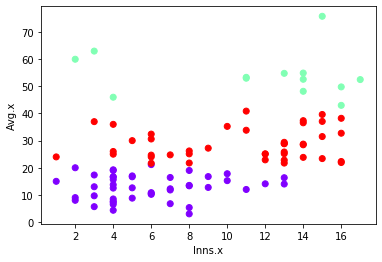

In [14]:
plt.scatter(clusters['Inns.x'],clusters['Avg.x'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Inns.x')
plt.ylabel('Avg.x')

In [15]:
from sklearn import preprocessing

x_scaled = preprocessing.scale(z)
x_scaled

array([[ 0.0879174 , -0.55038197],
       [ 0.52750438,  1.93747376],
       [-1.23084355,  2.59514366],
       [ 1.18688485,  0.24603111],
       [-0.57146308, -0.01241207],
       [ 1.62647183,  1.23491636],
       [ 1.18688485,  0.26371407],
       [-0.13187609, -1.32707176],
       [-0.13187609, -0.78298084],
       [-0.57146308, -0.05729958],
       [ 0.96709136, -0.57894674],
       [-1.01105006, -1.24749846],
       [-0.57146308, -0.25045185],
       [-1.01105006,  0.01071179],
       [ 0.52750438,  1.09073227],
       [ 1.62647183,  0.53643964],
       [-1.01105006,  1.43895046],
       [-1.01105006, -1.11147573],
       [-0.13187609,  0.09232543],
       [-0.79125657, -0.83262914],
       [-1.23084355, -1.30462801],
       [-0.35166959, -0.57282572],
       [-1.23084355, -0.80542459],
       [-1.23084355,  0.82684817],
       [-1.01105006, -0.55650299],
       [-0.13187609, -0.21032515],
       [ 1.62647183,  1.69739364],
       [ 0.30771089,  0.70782828],
       [ 0.96709136,

In [ ]:
wcss = []

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
wcss

In [ ]:
plt.plot(range(1,10),wcss)
plt.xlabel('numbers of clusters')
plt.ylabel('wcss')

In [ ]:
kmeans_new =KMeans(5)
kmeans_new.fit(x_scaled)
clusters_new = z.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

In [ ]:
clusters_new

In [ ]:
plt.scatter(clusters_new['Inns.x'],clusters_new['Avg.x'],c=clusters_new['cluster_pred'],cmap='rainbow')
plt.xlabel('numbers of innings')
plt.ylabel('Average')